In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm, trange
tqdm.pandas()

In [38]:
data = pd.read_csv('../data/reviews.csv', index_col=0)

In [39]:
def str_clean(review: str, char_clean: bool = False, clean_mark_number_patterns: bool = False, lowercase: bool = False, replace_yo: bool = False):
    import re

    if char_clean:
        _html_pattern = r'<[^<]+?>'
        review = re.sub(_html_pattern, ' ', review)

    if clean_mark_number_patterns:
        mark_number_pattern = r'\d{1,2} из \d{1,2}'
        review = re.sub(mark_number_pattern, '  ', review)

    if replace_yo:
        review = review.replace('ё', 'е')
        review = review.replace('Ё', 'Е')

    if lowercase:
        review = review.lower()

    review = review.strip()

    return review

In [40]:
data['review'] = data['review'].progress_apply(
    str_clean,
    char_clean=True, 
    clean_mark_number_patterns=True,
)

  0%|          | 0/90647 [00:00<?, ?it/s]

In [41]:
data[['review']].to_csv('../data/clean_reviews.csv')
data[['review']]

,review
0,«Зеленую милю» я смотрела два раза: 10 лет наз...
1,Период конца девяностых годов-начало двухтысяч...
2,"Очень сложно писать рецензию на этот фильм, та..."
3,Любимая многими миллионами ценителями киноиску...
4,В нашем мире существует много разных фильмов. ...
...,...
90642,Фильм «Ламборгини: Человек-легенда» снят в 202...
90643,"Эй, рагацци, вы это серьёзно, ТАК показывать и..."
90644,"Вообще, говоря о байопиках, стоит отметить, чт..."
90645,"Визуальное качество, впрочем, также не безупре..."


In [42]:
data['len'] = data['review'].str.len()

D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Progra

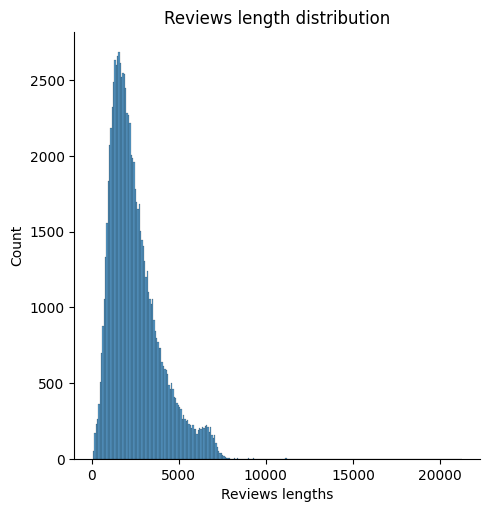

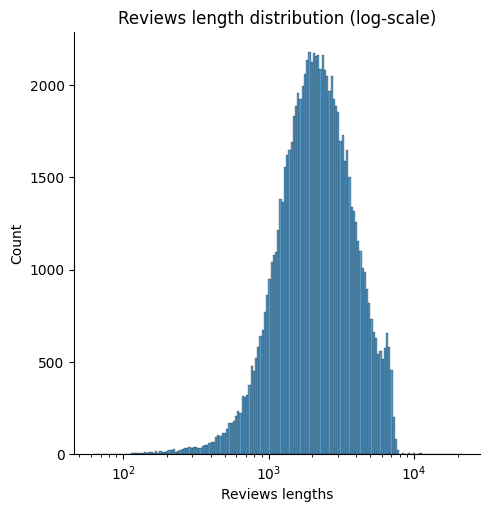

In [18]:
figure = sns.displot(data['review'].str.len())
plt.title('Reviews length distribution')
plt.xlabel("Reviews lengths")
plt.savefig('../data/review.str.len.displot.png', dpi=400, bbox_inches = 'tight')

figure = sns.displot(data['review'].str.len(), log_scale=True)
plt.title('Reviews length distribution (log-scale)')
plt.xlabel("Reviews lengths")
plt.savefig('../data/review.str.len.displot.logscale.png', dpi=400, bbox_inches = 'tight')

---

In [43]:
data['token_count'] = data['review'].str.split()
data['token_count'] = data['token_count'].progress_apply(len)

  0%|          | 0/90647 [00:00<?, ?it/s]

D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Progra

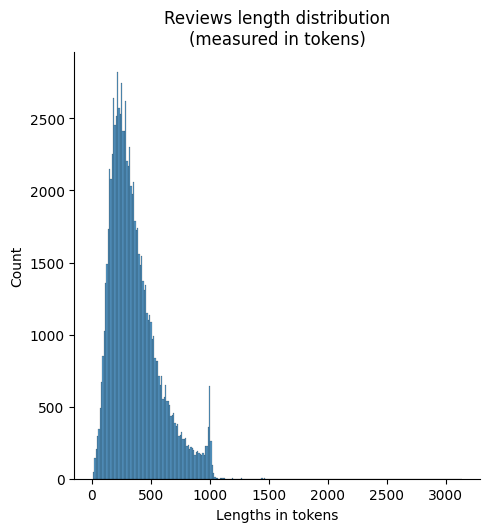

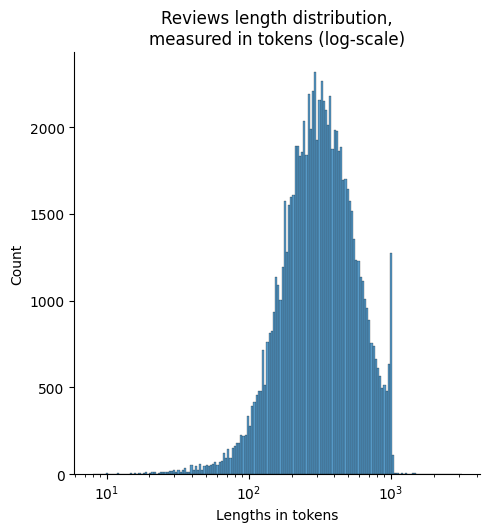

In [19]:
figure = sns.displot(data['token_count'])
plt.title('Reviews length distribution\n(measured in tokens)')
plt.xlabel("Lengths in tokens")
plt.savefig('data review.str.tokenlen.displot.png', dpi=400, bbox_inches = 'tight')

figure = sns.displot(data['token_count'], log_scale=True)
plt.title('Reviews length distribution,\nmeasured in tokens (log-scale)')
plt.xlabel("Lengths in tokens")
plt.savefig('data review.str.tokenlen.displot.log.png', dpi=400, bbox_inches = 'tight')

---

D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


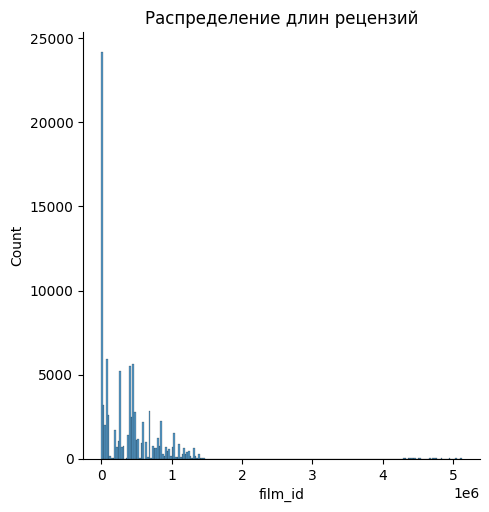

In [116]:
figure = sns.displot(data['film_id'])
plt.title('Распределение длин рецензий')
plt.savefig('data filmid displot.png', dpi=400, bbox_inches = 'tight')


In [21]:
df_film_id_n_reviews = data.groupby('film_id')[['review']].agg(len)
df_film_id_n_reviews = df_film_id_n_reviews.sort_values(by='review', ascending=False)
df_film_id_n_reviews.columns = ['number_of_reviews']
df_film_id_n_reviews

,number_of_reviews
film_id,
401177,1751
447301,1678
258687,1254
111543,1049
405609,1021
...,...
737716,1
1199528,1
3870,1


In [22]:
df_film_id_n_reviews.mean()

number_of_reviews    112.88543
dtype: float64

D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Yaroslav Pristalov\AppData\Local\Temp\ipykernel_25624\443906462.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  figure = sns.histplot(df_film_id_n_reviews['number_of_reviews'], palette='Blues', bins=100)
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


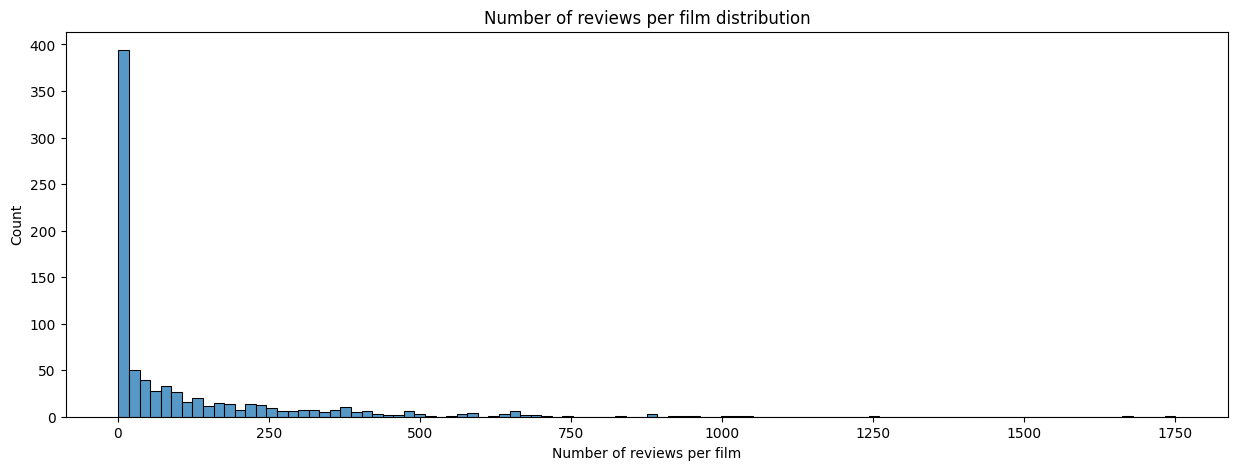

In [25]:
plt.figure(figsize=(15, 5))
figure = sns.histplot(df_film_id_n_reviews['number_of_reviews'], palette='Blues', bins=100)
plt.xlabel("Number of reviews per film")
plt.title('Number of reviews per film distribution')
plt.savefig('../data/n_reviews_per_film.displot.png', dpi=400, bbox_inches = 'tight')


---

In [123]:
(data['len'] / data['token_count']).mean()

6.818755110410769